In [39]:
from orix.crystal_map.utilities import spatial_decomposition
import shapely
import numpy as np

In [40]:
#[V,F,I_FD] = spatialDecomposition([ebsd.prop.x(:), ebsd.prop.y(:)],ebsd.unitCell,varargin{:});
import numpy as np
from orix.crystal_map.utilities import spatial_decomposition
X = np.loadtxt('../spatial_decomposition_test_folder/spatialDecomposition_input_X.csv', delimiter=',', dtype=float)
uc = np.loadtxt('../spatial_decomposition_test_folder/calcUnitCell_output_unitCell.csv', delimiter=',', dtype=float)
V, F, I_FD = spatial_decomposition(X, unit_cell=uc)

/Users/paytone/Documents/GitHub/Mart2Aust_Hackathon/orix/crystal_map/utilities.py:384: UserWarning: parameter a must be of integer type. Converting a into integers and moving on...
  warnings.warn('parameter ''a'' must be of integer type. Converting ''a'' into integers and moving on...')


/Users/paytone/Documents/GitHub/Mart2Aust_Hackathon/orix/crystal_map/utilities.py:384: UserWarning: parameter a must be of integer type. Converting a into integers and moving on...
  warnings.warn('parameter ''a'' must be of integer type. Converting ''a'' into integers and moving on...')


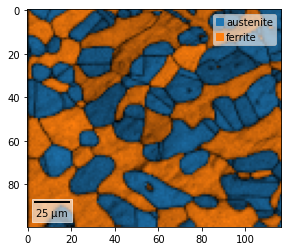

In [63]:
from orix import data, io, plot
ebsd = data.sdss_ferrite_austenite(allow_download=True)
ebsd.plot(overlay="dp")

X = np.array([ebsd.x, ebsd.y]).T
V, F, I_FD = spatial_decomposition(X, unit_cell=uc)

In [64]:
np.unique(ebsd.phase_id)


array([1, 2])

In [65]:
gbcValue = 5
maxDist = 0

In [73]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
Author: Tyler Martin
Github: martint98
Date: 5/16/2022
"""


import numpy as np
from scipy.sparse import csr_matrix, triu, find
#import markov_clustering as mc
import networkx as nx
import matplotlib.pyplot as plt
from orix.crystal_map.utilities import gbc_angle

#def do_segmentation(I_FD, ebsd, maxDist=0):
# Output
# A_Db - adjacency matrix of grain boundaries
# A_Do - adjacency matrix inside grain connections

## if numel(gbcValue) == 1 && length(ebsd.CSList) > 1
phase_ids = np.unique(ebsd.phase_id)
if np.size(gbcValue) == 1 and len(phase_ids) > 1:
    ##   gbcValue = repmat(gbcValue,size(ebsd.CSList))
    gbcValue = np.repeat(gbcValue, np.shape(phase_ids))
    
# get pairs of neighbouring cells {D_l,D_r} in A_D
A_D = I_FD.T * I_FD == 1

## [Dl,Dr] = find(triu(A_D,1))
Dl, Dr, _  = find(triu(A_D, k=1))          # Get upper triangular part of matrix
    
connect = np.zeros(np.shape(Dl), dtype=bool)

## for p = 1:numel(ebsd.phaseMap)
for p in phase_ids:

    ndx = np.all([ebsd.phase_id[Dl] == p, ebsd.phase_id[Dr] == p])

    connect[ndx] = True        

    # check, whether they are indexed
    ndx = np.all([ndx, ebsd.is_indexed[Dl], ebsd.is_indexed[Dr]])                            # returns index if all true
    
    # now check for the grain boundary criterion
    if np.any(ndx):

        connect[ndx] = gbc_angle(ebsd.rotations, ebsd.phases[p], Dl[ndx], Dr[ndx], gbc_value)

# adjacency of cells that have no common boundary
A_Do = csr_matrix((1, (Dl[connect], Dr[connect])), [ebsd.size, ebsd.size]);

# Make symmetric
rows, cols = A_Do.nonzero()
A_Do[cols, rows] = A_Do[rows, cols]

mask = np.ones(connect.shape[2], dtype=bool)
mask[connect] = False

A_Db = csr_matrix((1, (Dl[mask], Dr[mask])), [ebsd.size, ebsd.size]);
rows, cols = A_Db.nonzero()
A_Db[cols, rows] = A_Db[rows, cols]

#return A_Do, A_Db



SyntaxError: invalid syntax (1040901523.py, line 50)

In [80]:
ebsd.size

11700

In [38]:






# adjacency of cells that have no common boundary
ind = connect > 0
# A_Do = sparse(double(Dl(ind)),double(Dr(ind)),connect(ind),length(ebsd),length(ebsd))
A_Do = sparse.spmatrix(float(Dl(ind)), float(Dr(ind)), connect(ind), len(ebsd), len(ebsd))
if check_option(varargin,'mcl'):
    param = get_option(varargin,'mcl')
    if isempty(param): 
        param = 1.4
    if max(param.shape) == 1:
        param = [param,4]
    ## A_Do = mclComponents(A_Do,param(1),param(2))
    A_Do = mc.run_mcl(A_Do, param(1), param(2))                # A_Do is adjacency matrix inside grain connections
    A_Db = sparse.spmatrix(float(Dl), float(Dr), true, max(ebsd.shape), max(ebsd.shape)) and not A_Do
else:
    A_Db = sparse.spmatrix(float(Dl(connect<1)), float(Dr(connect<1)), true, max(ebsd.shape), max(ebsd.shape))

A_Do = A_Do | A_Do.T
# adjacency of cells that have a common boundary
A_Db = A_Db | A_Db.T
# compute I_DG connected components of A_Do
# I_DG - incidence matrix cells to grains
## I_DG = sparse(1:max(ebsd.shape), float(connectedComponents(A_Do)),1)
#I_DG = sparse.csr_matrix(float(sparse.csgraph.connected_components(A_Do)),1:max(ebsd.shape), )

#    return A_Db, A_Do

print(A_Do)

#if __name__ == '__main__':
#    # Determine which cells to connect
#    A_Db, A_Do = do_segmentation(I_FD, ebsd, varargin[:])
#    # A_Db - neighboring cells with grain boundary
#    # I_DG - incidence matrix cells to grains

AttributeError: 'CrystalMap' object has no attribute 'phaseMap'

In [1]:
do_segmentation(I_FD, ebsd, varargin)

/Users/paytone/Documents/GitHub/Mart2Aust_Hackathon/orix/crystal_map/utilities.py:384: UserWarning: parameter a must be of integer type. Converting a into integers and moving on...
  warnings.warn('parameter ''a'' must be of integer type. Converting ''a'' into integers and moving on...')


In [2]:
I_FD

<471791x106760 sparse matrix of type '<class 'numpy.float64'>'
	with 628971 stored elements in Compressed Sparse Row format>